In [104]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt   

%matplotlib inline

### Linear regression using the <em> Normal equation 

In [146]:
X = 2 * np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

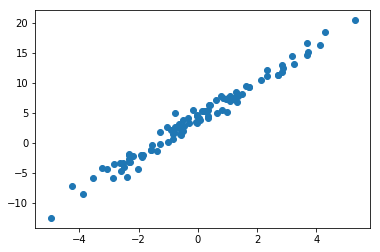

In [106]:
plt.scatter(X, y)

In [147]:
X_b = np.c_[np.ones((100,1)), X] ## Add the constant parameter 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [149]:
X_b.shape

(100, 2)

In [108]:
theta_best # Can't predict the exact parameter values due to the noise that was introduced 

array([[4.10094999],
       [3.03531562]])

In [109]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

In [110]:
y_predict

array([[ 4.10094999],
       [10.17158123]])

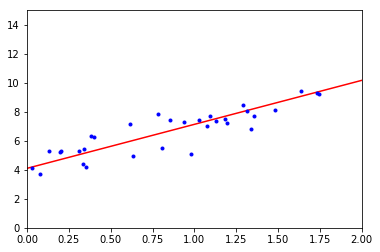

In [111]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [112]:
# Using SKlearn 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('Intercept - ', lin_reg.intercept_[0])
print('Coefficient - ', lin_reg.coef_[0][0])

Intercept -  4.100949988029171
Coefficient -  3.035315621367141


## Gradient Descent 

### Batch gradient descent 

<em> Applying gradient descent to the gradient function of the Least Squares cost function 

In [113]:
eta = 0.1 # Learning rate 
n_iterations = 1000
m = 100

def gradient_descent(eta, n_iterations, m):
    
    theta = np.random.randn(2, 1) # random initialization

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients 
    
    return theta 

In [114]:
gradient_descent(eta, n_iterations, m)

array([[4.10094999],
       [3.03531562]])

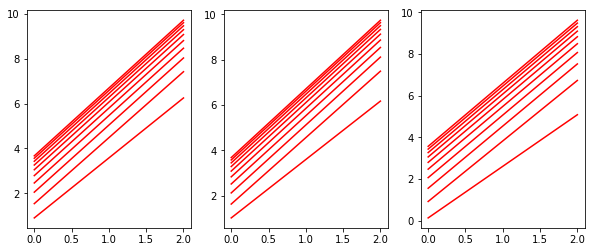

In [115]:
## Checking how gradient descent works with the learning rate 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

etas = [0.002, 0.01, 1.2]


for j in range(3):
    
    theta = np.random.randn(2, 1) 
    
    for iteration in range(10):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients 
        y_predict = X_new_b.dot(theta)
        axes[j].plot(X_new, y_predict, "r-")

<em> On the left, the learning rate is too low: the algorithm will eventually reach the solution,
but it will take a long time. In the middle, the learning rate looks pretty good: in
just a few iterations, it has already converged to the solution. On the right, the learning
rate is too high: the algorithm diverges, jumping all over the place and actually
getting further and further away from the solution at every step.

### Stochastic Gradient Descent 

<em> Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster
since it has very little data to manipulate at every iteration

<em>The function that determines the learning rate at each iteration
is called the learning schedule. If the learning rate is reduced too quickly, you may get
stuck in a local minimum, or even end up frozen halfway to the minimum. If the
learning rate is reduced too slowly, you may jump around the minimum for a long
time and end up with a suboptimal solution if you halt training too early.

In [116]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_shedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_shedule(epoch * m + i)
        theta = theta - eta * gradients 

<em>By convention we iterate by rounds of m iterations; each round is called an epoch.
While the Batch Gradient Descent code iterated 1,000 times through the whole training
set, this code goes through the training set only 50 times and reaches a fairly good
solution:

In [117]:
theta

array([[4.06779152],
       [3.0741834 ]])

In [118]:
# the first 10 steps of training (notice how irregular the steps are).

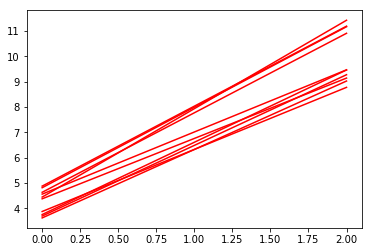

In [119]:
for i in range(10):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_shedule(i)
    theta = theta - eta * gradients 
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, "r-")

<em>Note that since instances are picked randomly, some instances may be picked several
times per epoch while others may not be picked at all. If you want to be sure that the
algorithm goes through every instance at each epoch, another approach is to shuffle
the training set, then go through it instance by instance, then shuffle it again, and so
on. However, this generally converges more slowly.

<br><em>To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRegressor class, which defaults to optimizing the squared error cost function.

In [120]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=100, max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=100, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [121]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.11140598]), array([2.9994858]))

### Mini-batch Gradient Descent

<em>The algorithm’s progress in parameter space is less random than with SGD, especially
with fairly large mini-batches. As a result, Mini-batch GD will end up walking
around a bit closer to the minimum than SGD. But, on the other hand, it may be
harder for it to escape from local minima

<em>The main advantage of Mini-batch GD over Stochastic GD is that you can
get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.

## Polynomial Regression

In [122]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

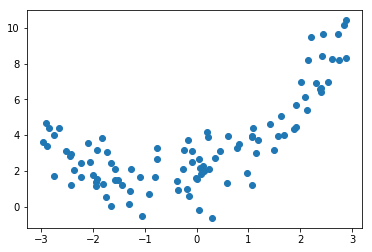

In [123]:
plt.scatter(X, y)
plt.show()

<em>

- Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree
polynomial) of each feature in the training set as new features
    
- if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]

In [124]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [125]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.83359057]), array([[0.98428433, 0.56401036]]))

<em> the original function was y = 0 . 5x^2 + 1.0x + 2 . 0 + Gaussian noise

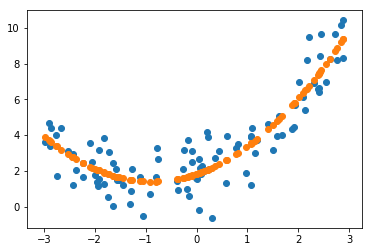

In [126]:
plt.scatter(X, y)
plt.scatter(X, lin_reg.predict(X_poly))

## Learning Curves

In [127]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

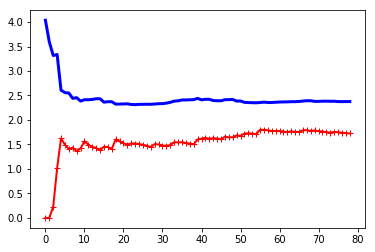

In [128]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

<em> This is a typical case of an underfitting model. If your model is underfitting the training data, adding more training
examples will not help. You need to use a more complex model
or come up with better features.

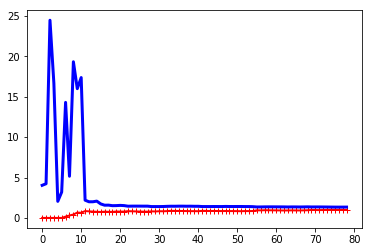

In [129]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ('poly_features', PolynomialFeatures(degree=5, include_bias=False)),
        ('sgd_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

<em> Highly overfitting model. There is a gap between the curves. This means that the model performs significantly
better on the training data than on the validation data, which is the hallmark
of an overfitting model

## Regularization

### Ridge regression

- When alpha = 0, Ridge is just the linear regression 
- When alpha is extreamly large all the coefficients tends to be zero 
- Note that the bias term is not regularized

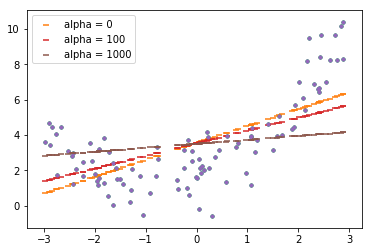

In [130]:
from sklearn.linear_model import Ridge

alpha = [0, 100, 1000]

for i in alpha:
    ridge_reg = Ridge(alpha=i, solver='cholesky')
    ridge_reg.fit(X, y)
    plt.scatter(X, y, marker='.')
    plt.scatter(X, ridge_reg.predict(X), label='alpha = {}'.format(i), marker='_')
    plt.legend()

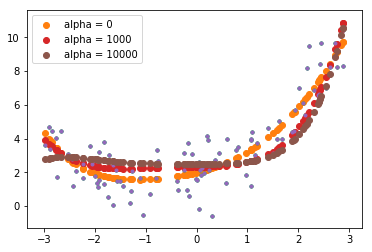

In [131]:
X_poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly = X_poly.fit_transform(X)

alpha = [0, 1000, 10000]

for i in alpha:
    ridge_reg = Ridge(alpha=i, solver='cholesky')
    ridge_reg.fit(X_poly, y)
    plt.scatter(X, y, marker='.')
    plt.scatter(X, ridge_reg.predict(X_poly), label='alpha = {}'.format(i))
    plt.legend()

<em>Note how
increasing α leads to flatter (i.e., less extreme, more reasonable) predictions; this
reduces the model’s variance but increases its bias.

### Lasso Regression

<em>An important characteristic of Lasso Regression is that it tends to completely eliminate
the weights of the least important features. In
other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

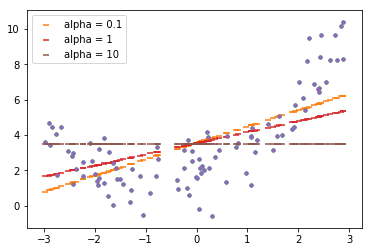

In [132]:
from sklearn.linear_model import Lasso

alpha = [0.1 , 1, 10]

for i in alpha:
    lasso_reg = Lasso(alpha=i)
    lasso_reg.fit(X, y)
    plt.scatter(X, y, marker='.')
    plt.scatter(X, lasso_reg.predict(X), label='alpha = {}'.format(i), marker='_')
    plt.legend()

<em> More severe flatting of the lines compared the ridge regression

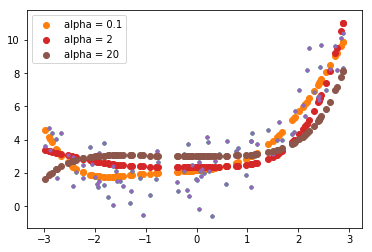

In [133]:
X_poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly = X_poly.fit_transform(X)

alpha = [0.1, 2, 20]

for i in alpha:
    lasso_reg = Lasso(alpha=i)
    lasso_reg.fit(X_poly, y)
    plt.scatter(X, y, marker='.')
    plt.scatter(X, lasso_reg.predict(X_poly), label='alpha = {}'.format(i))
    plt.legend()

### Elastic Net 

<em>
- Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression
    
- Elastic Net is preferred over Lasso since Lasso may behave erratically when the number
of features is greater than the number of training instances or when several features
are strongly correlated

In [134]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.93800851])

## Early Stopping

<em>As the
epochs go by, the algorithm learns and its prediction error (RMSE) on the training set
naturally goes down, and so does its prediction error on the validation set. However,
after a while the validation error stops decreasing and actually starts to go back up.
This indicates that the model has started to overfit the training data

In [135]:
from sklearn.preprocessing import StandardScaler

X_poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = X_poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
X_poly_scale_train, X_poly_scale_val, y_train, y_val = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42) 

theta = np.random.randn(2, 1) 
RMSE_train = []
RMSE_val = []

eta = 0.01 

for iteration in range(500):
    gradients = 2/m * X_poly_scale_train.T.dot(X_poly_scale_train.dot(theta) - y_train)
    theta = theta - eta * gradients 
    y_predict_train = X_poly_scale_train.dot(theta)
    y_predict_val = X_poly_scale_val.dot(theta)
    RMSE_train.append(mean_squared_error(y_train, y_predict_train))
    RMSE_val.append(mean_squared_error(y_val, y_predict_val))

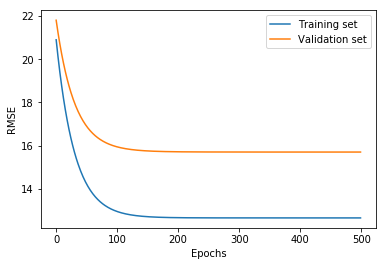

In [136]:
plt.plot(range(500), RMSE_train, label = 'Training set')
plt.plot(range(500), RMSE_val, label = 'Validation set')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [137]:
# # Implementation 

from warnings import filterwarnings
from sklearn.base import clone

filterwarnings('ignore')

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, 
                      learning_rate='constant', eta0 = 0.005, tol=None)

minimum_val_error = float('inf') # unbounded upper value for comparison
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_poly_scale_train, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_poly_scale_val)
    val_error = mean_squared_error(y_val_predict, y_val)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch 
        best_model = clone(sgd_reg)

In [138]:
best_epoch

500

## Logistic Regression

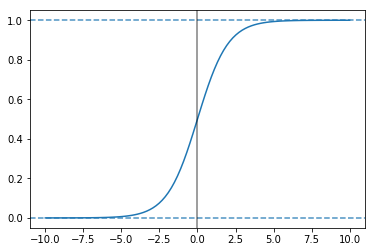

In [139]:
## Logit function 

x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))

plt.plot(x, y)
plt.axhline(y=1, linestyle='--', alpha=0.8)
plt.axhline(y=0, linestyle='--', alpha=0.8)
plt.axvline(x=0, color='black', alpha=0.5)
plt.show()

In [140]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [152]:
# build a classifier to detect the Iris-Virginica type based only on the petal width feature.

X = iris['data'][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) 

In [153]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [162]:
from sklearn.metrics import accuracy_score

accuracy_score(y, log_reg.predict(X))

0.96

<br><em> Let’s look at the model’s estimated probabilities for flowers with petal widths varying
from 0 to 3 cm 

In [143]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

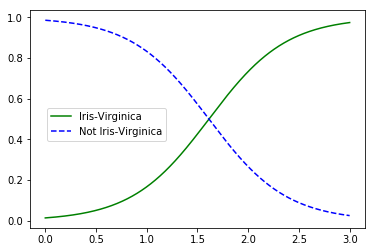

In [144]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend(loc=(0.05,0.4))

In [145]:
log_reg.predict([[1.7], [1.5]]) # 1.6 is the cutoff point 

array([1, 0])

## Softmax regression